房客和房東使用 Airbnb 來拓展旅行的可能性，該數據集描述了 2019 年紐約市的房源活動和指標。這個公共數據集是 Airbnb 的一部分。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('Solarize_Light2')

data = pd.read_csv("input/pd-NYC2019.csv") 
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


### 房屋件數分布 (neighbourhood, neighbourhood_group)

In [2]:
data.groupby('neighbourhood').size()
data.groupby('neighbourhood_group').size()
# Brooklyn 和 Manhattan 的 airbnb 件數最多

neighbourhood_group
Bronx              31
Brooklyn         1344
Manhattan        1345
Queens            194
Staten Island      25
dtype: int64

Text(0, 0.5, 'Case Number')

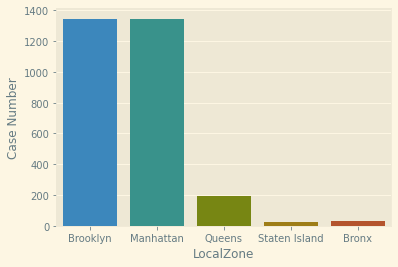

In [3]:
sns.countplot(x='neighbourhood_group', data=data)
plt.xlabel('LocalZone')
plt.ylabel('Case Number')

### 房屋平均價格 (mean)

In [5]:
# way1
NG_price_s = data.groupby(by=['neighbourhood_group'])['price'].sum() 
NG_price_c = data.groupby(by=['neighbourhood_group'])['price'].count() 
NG_price = NG_price_s / NG_price_c

In [6]:
# way2
mm = data.groupby('neighbourhood_group')['price'].mean()              # 直接顯示無法製圖
mm = data.groupby('neighbourhood_group')['price'].mean().reset_index()  #reset_index()製成表格
mm

,neighbourhood_group,price
0,Bronx,70.000000
1,Brooklyn,144.888393
2,Manhattan,186.139033
3,Queens,98.268041
4,Staten Island,121.400000


Text(0, 0.5, 'Avg Price')

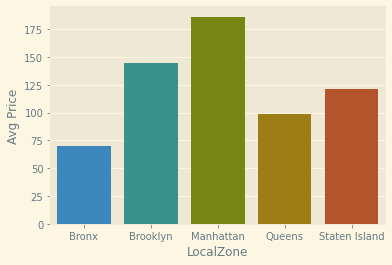

In [7]:
sns.barplot(x='neighbourhood_group', y='price', data=mm)
plt.xlabel('LocalZone')
plt.ylabel('Avg Price')

### 不同區域,房型的平均價格 (groupby)

In [8]:
avg_price = data.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()  #reset_index()製成表格
avg_price.head()

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,106.000000
1,Bronx,Private room,52.857143
2,Brooklyn,Entire home/apt,182.353750
3,Brooklyn,Private room,90.191729
4,Brooklyn,Shared room,72.083333


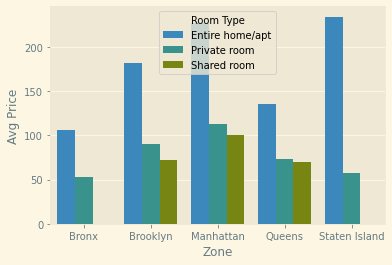

In [9]:
sns.barplot(x='neighbourhood_group', y='price', hue='room_type',data=avg_price)
plt.xlabel('Zone')
plt.ylabel('Avg Price')
plt.legend(title='Room Type')

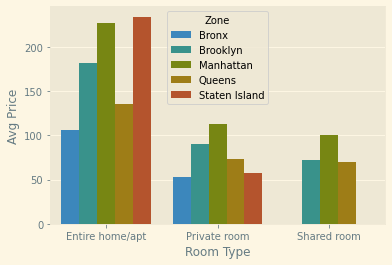

In [10]:
sns.barplot(x='room_type',  y='price', hue='neighbourhood_group',data=avg_price)
plt.xlabel('Room Type')
plt.ylabel('Avg Price')
plt.legend(title='Zone')

### 擁有房間數目最多的房東

In [11]:
data_index = data['host_id'].reset_index()  #房東編號
data_index.head()

,index,host_id
0,0,2787
1,1,2845
2,2,4632
3,3,4869
4,4,7192


In [12]:
data_index = data.groupby('host_id').size().sort_values(ascending=False).head().reset_index() #房東編號有多少 value_counts
data_index

,host_id,0
0,417504,28
1,1475015,11
2,6885157,8
3,7503643,7
4,2015914,6


In [13]:
pd.merge(data_index,data[['host_id','host_name']].drop_duplicates('host_id'),on='host_id')

,host_id,0,host_name
0,417504,28,The Box House Hotel
1,1475015,11,Mike
2,6885157,8,Randy
3,7503643,7,Vida
4,2015914,6,Majar


### 擁有房間租金總額最多的前10名房東

In [14]:
data_index = data.groupby('host_id')['price'].sum().sort_values(ascending=False).head(10).reset_index()
data_index

,host_id,price
0,417504,6962
1,836168,6000
2,213266,5000
3,4289240,4000
4,256239,3000
5,4751930,2500
6,605463,2300
7,2214774,1899
8,462379,1693
9,273174,1575


In [15]:
pd.merge(data_index,data[['host_id','host_name']].drop_duplicates('host_id'),on='host_id')

,host_id,price,host_name
0,417504,6962,The Box House Hotel
1,836168,6000,Henry
2,213266,5000,Jessica
3,4289240,4000,Lucy
4,256239,3000,Tracey
5,4751930,2500,Martin
6,605463,2300,West Village
7,2214774,1899,Ben And Jess
8,462379,1693,Loretta
9,273174,1575,Jon


### 那個區域比較熱門

In [16]:
data.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False).reset_index()

,neighbourhood_group,number_of_reviews
0,Manhattan,89873
1,Brooklyn,88805
2,Queens,14060
3,Bronx,3337
4,Staten Island,1536


In [17]:
data.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False).head(10).reset_index()

,neighbourhood,number_of_reviews
0,Williamsburg,21695
1,Harlem,17079
2,Bedford-Stuyvesant,16665
3,East Village,14448
4,Upper West Side,8119
5,Lower East Side,6089
6,Hell's Kitchen,6058
7,Crown Heights,5825
8,East Harlem,5628
9,Greenpoint,4982


In [18]:
subData = data.groupby(['neighbourhood_group','neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False).head(10).reset_index()
subData

,neighbourhood_group,neighbourhood,number_of_reviews
0,Brooklyn,Williamsburg,21695
1,Manhattan,Harlem,17079
2,Brooklyn,Bedford-Stuyvesant,16665
3,Manhattan,East Village,14448
4,Manhattan,Upper West Side,8119
5,Manhattan,Lower East Side,6089
6,Manhattan,Hell's Kitchen,6058
7,Brooklyn,Crown Heights,5825
8,Manhattan,East Harlem,5628
9,Brooklyn,Greenpoint,4982


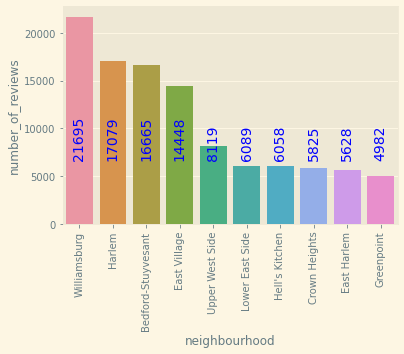

In [19]:
g = sns.barplot(x='neighbourhood',y='number_of_reviews',data=subData)
plt.xticks(rotation=90)
i = 0

for value in subData['number_of_reviews'].values:
    g.text(i, 7000, value, color='#0000FF', size=14, rotation= 90, ha="center")
    i += 1